# Load & update package
Use update with caution, sometimes packages may implement breaking changes. If unsure, only 
use `Pkg.resolve()`

In [ ]:
using Damysos, CairoMakie, Accessors, DataFrames, CSV

In [1]:
pwd()

"/misc/rz_cloud/richter/how09898/.julia/dev/Damysos/jupyter"

In [2]:
using Pkg
Pkg.update()

    Updating registry at `~/.julia/registries/General.toml`
   Installed Xorg_libpthread_stubs_jll ─ v0.1.1+1
   Installed Libmount_jll ────────────── v2.40.2+0
   Installed Xorg_libXau_jll ─────────── v1.0.11+1
   Installed FreeType2_jll ───────────── v2.13.3+0
   Installed OpenMPI_jll ─────────────── v5.0.6+0
   Installed CUDA_Runtime_jll ────────── v0.15.5+0
   Installed CUDA_Driver_jll ─────────── v0.10.4+0
   Installed StochasticDiffEq ────────── v6.71.1
   Installed Xorg_libXdmcp_jll ───────── v1.1.4+1
   Installed Glib_jll ────────────────── v2.82.2+0
   Installed Libuuid_jll ─────────────── v2.40.2+0
   Installed Graphite2_jll ───────────── v1.3.14+1
   Installed Xorg_xtrans_jll ─────────── v1.5.0+1
   Installed DelaunayTriangulation ───── v1.6.3
Precompiling CUDA_Driver_jll...
    569.0 ms  ✓ JLLWrappers
    916.4 ms  ✓ CUDA_Driver_jll
  2 dependencies successfully precompiled in 4 seconds. 28 already precompiled.
  No Changes to `/misc/rz_cloud/richter/how09898/.julia/dev/Dam

# Load Fermi-sea data

In [3]:
function load_hdf5_files(path::String)
	allfiles = String[]
	for (root, dirs, files) in walkdir(path)
		for file in files
			file[end-4:end] == ".hdf5" && push!(allfiles,joinpath(root, file))
		end
	end
	@info "$(length(allfiles)) files found."
	return allfiles
end

load_hdf5_files (generic function with 1 method)

In [5]:
dirac_kymaxpath = "/home/how09898/phd/data/dirac/zeta-M-sweep1/kymax-rough/"
dirac_kymaxfiles = load_hdf5_files(dirac_kymaxpath)
dirac_kymaxsims = Damysos.loadlast_testsim.(dirac_kymaxfiles)
dirac_kymaxvels = [s.observables[2] for s in dirac_kymaxsims]
quad_kymaxpath = "/home/how09898/phd/data/quadratic/zeta-M-sweep1/kymax-rough/"
quad_kymaxfiles = load_hdf5_files(quad_kymaxpath)
quad_kymaxsims = Damysos.loadlast_testsim.(quad_kymaxfiles)
quad_kymaxvels = [s.observables[2] for s in quad_kymaxsims]

┌ Info: 9 files found.
└ @ Main /home/how09898/.julia/dev/Damysos/jupyter/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sdnNjb2RlLXJlbW90ZQ==.jl:8
┌ Info: 9 files found.
└ @ Main /home/how09898/.julia/dev/Damysos/jupyter/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sdnNjb2RlLXJlbW90ZQ==.jl:8


9-element Vector{Velocity{Float64}}:
 Velocity{Float64}([-6.1359769803543166e-15, 6.177517437320618e-7, 1.0891432007812808e-6, 1.3455254126047145e-6, 1.3806857459149517e-6, 1.246171338614108e-6, 1.0258732885559082e-6, 8.020458027461199e-7, 6.274616650145575e-7, 5.140838912759235e-7  …  -0.012537548140208783, -0.011997121135274052, -0.011444768713155192, -0.01088151035686842, -0.010308370172456392, -0.009726375198152403, -0.009136553729155217, -0.008539933661276528, -0.007937540855718206, -0.007330397527540876], [-6.1359769803543166e-15, -1.589361340983496e-16, 5.362140393023008e-15, 8.337633264175717e-16, -6.0135179917867355e-15, -5.211020790109823e-18, -6.208931271415854e-15, 5.5054434647510276e-15, -5.380378965788392e-15, -6.448638227760906e-15  …  -2.319894359547357e-5, -2.3209997399528722e-5, -2.3223636689740454e-5, -2.3239730265406152e-5, -2.32581472254178e-5, -2.327875735975036e-5, -2.330143126184525e-5, -2.3326040649033398e-5, -2.3352458530416096e-5, -2.3380559400993765e-5], [0.

In [6]:
diracpath = "/home/how09898/phd/data/dirac/zeta-M-sweep1/dt_1e-4_dkx_1e-2_dky_1e-2_kxmax_1e-2"
diracfiles = load_hdf5_files(diracpath)
diracsims = Damysos.loadlast_testsim.(diracfiles)
quadpath = "/home/how09898/phd/data/quadratic/zeta-M-sweep1/kxmax1_good"
quadfiles = load_hdf5_files(quadpath)
quadsims = Damysos.loadlast_testsim.(quadfiles)

┌ Info: 9 files found.
└ @ Main /home/how09898/.julia/dev/Damysos/jupyter/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sdnNjb2RlLXJlbW90ZQ==.jl:8
┌ Info: 9 files found.
└ @ Main /home/how09898/.julia/dev/Damysos/jupyter/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sdnNjb2RlLXJlbW90ZQ==.jl:8


9-element Vector{Simulation{Float64}}:
 Simulation{Float64}(TwoBandDephasingLiouvillian{Float64}(QuadraticToy{Float64}(0.6283185307179587, 0.10000000000000005), Inf, Inf), GaussianAPulse{Float64}(1.5, 6.283185307179586, 15.749609945722415, 0.0, 0.0), NumericalParams2d{Float64}(0.007519884823892999, 1.0, 33.689084011040634, 1.0, 0.00625, -7.5, 1.0e-10, 1.0e-12), Damysos.Observable{Float64}[Occupation{Float64}([0.0, 6.002767714383796e-16, 2.259251656933519e-15, 4.7587440689320036e-15, 7.875861719506308e-15, 1.1386398912448505e-14, 1.5068584354545353e-14, 1.8707174491085935e-14, 2.209788509833014e-14, 2.505215038858135e-14  …  0.04676325745331787, 0.046763257453416994, 0.04676325745353884, 0.04676325745368186, 0.04676325745384445, 0.046763257454024945, 0.04676325745422163, 0.04676325745443278, 0.04676325745465663, 0.04676325745489142]), Velocity{Float64}([5.197241293064222e-16, 6.129447336077397e-9, 1.1888825192502846e-8, 1.724863697280031e-8, 2.2179531689870653e-8, 2.665242740047234e-8, 

In [7]:
diracvels = [s.observables[2] for s in diracsims]
quadvels = [s.observables[2] for s in quadsims]

9-element Vector{Velocity{Float64}}:
 Velocity{Float64}([5.197241293064222e-16, 6.129447336077397e-9, 1.1888825192502846e-8, 1.724863697280031e-8, 2.2179531689870653e-8, 2.665242740047234e-8, 3.063855867335858e-8, 3.4109470092725725e-8, 3.703694869407643e-8, 3.939295752615183e-8  …  -1.1284518415635624e-5, -1.115681424944365e-5, -1.1013987167774636e-5, -1.0856433994813444e-5, -1.0684569919283665e-5, -1.0498827626075225e-5, -1.0299656396428667e-5, -1.0087521203095448e-5, -9.862901782716986e-6, -9.62629169564371e-6], [5.197241293064222e-16, 8.662068821773704e-16, 1.2126896350483186e-15, 1.0394482586128444e-15, 6.063448175241593e-16, 9.528275703951073e-16, 5.197241293064222e-16, 1.2993103232660555e-15, 5.197241293064222e-16, 6.063448175241593e-16  …  4.084028857303051e-8, 4.031833846527827e-8, 3.967523286712276e-8, 3.8917501159421144e-8, 3.8051632097927826e-8, 3.708405423701887e-8, 3.602113159865764e-8, 3.486914851377434e-8, 3.363430199964543e-8, 3.2322694137273104e-8], [0.0, 6.1294465180

# Dirac

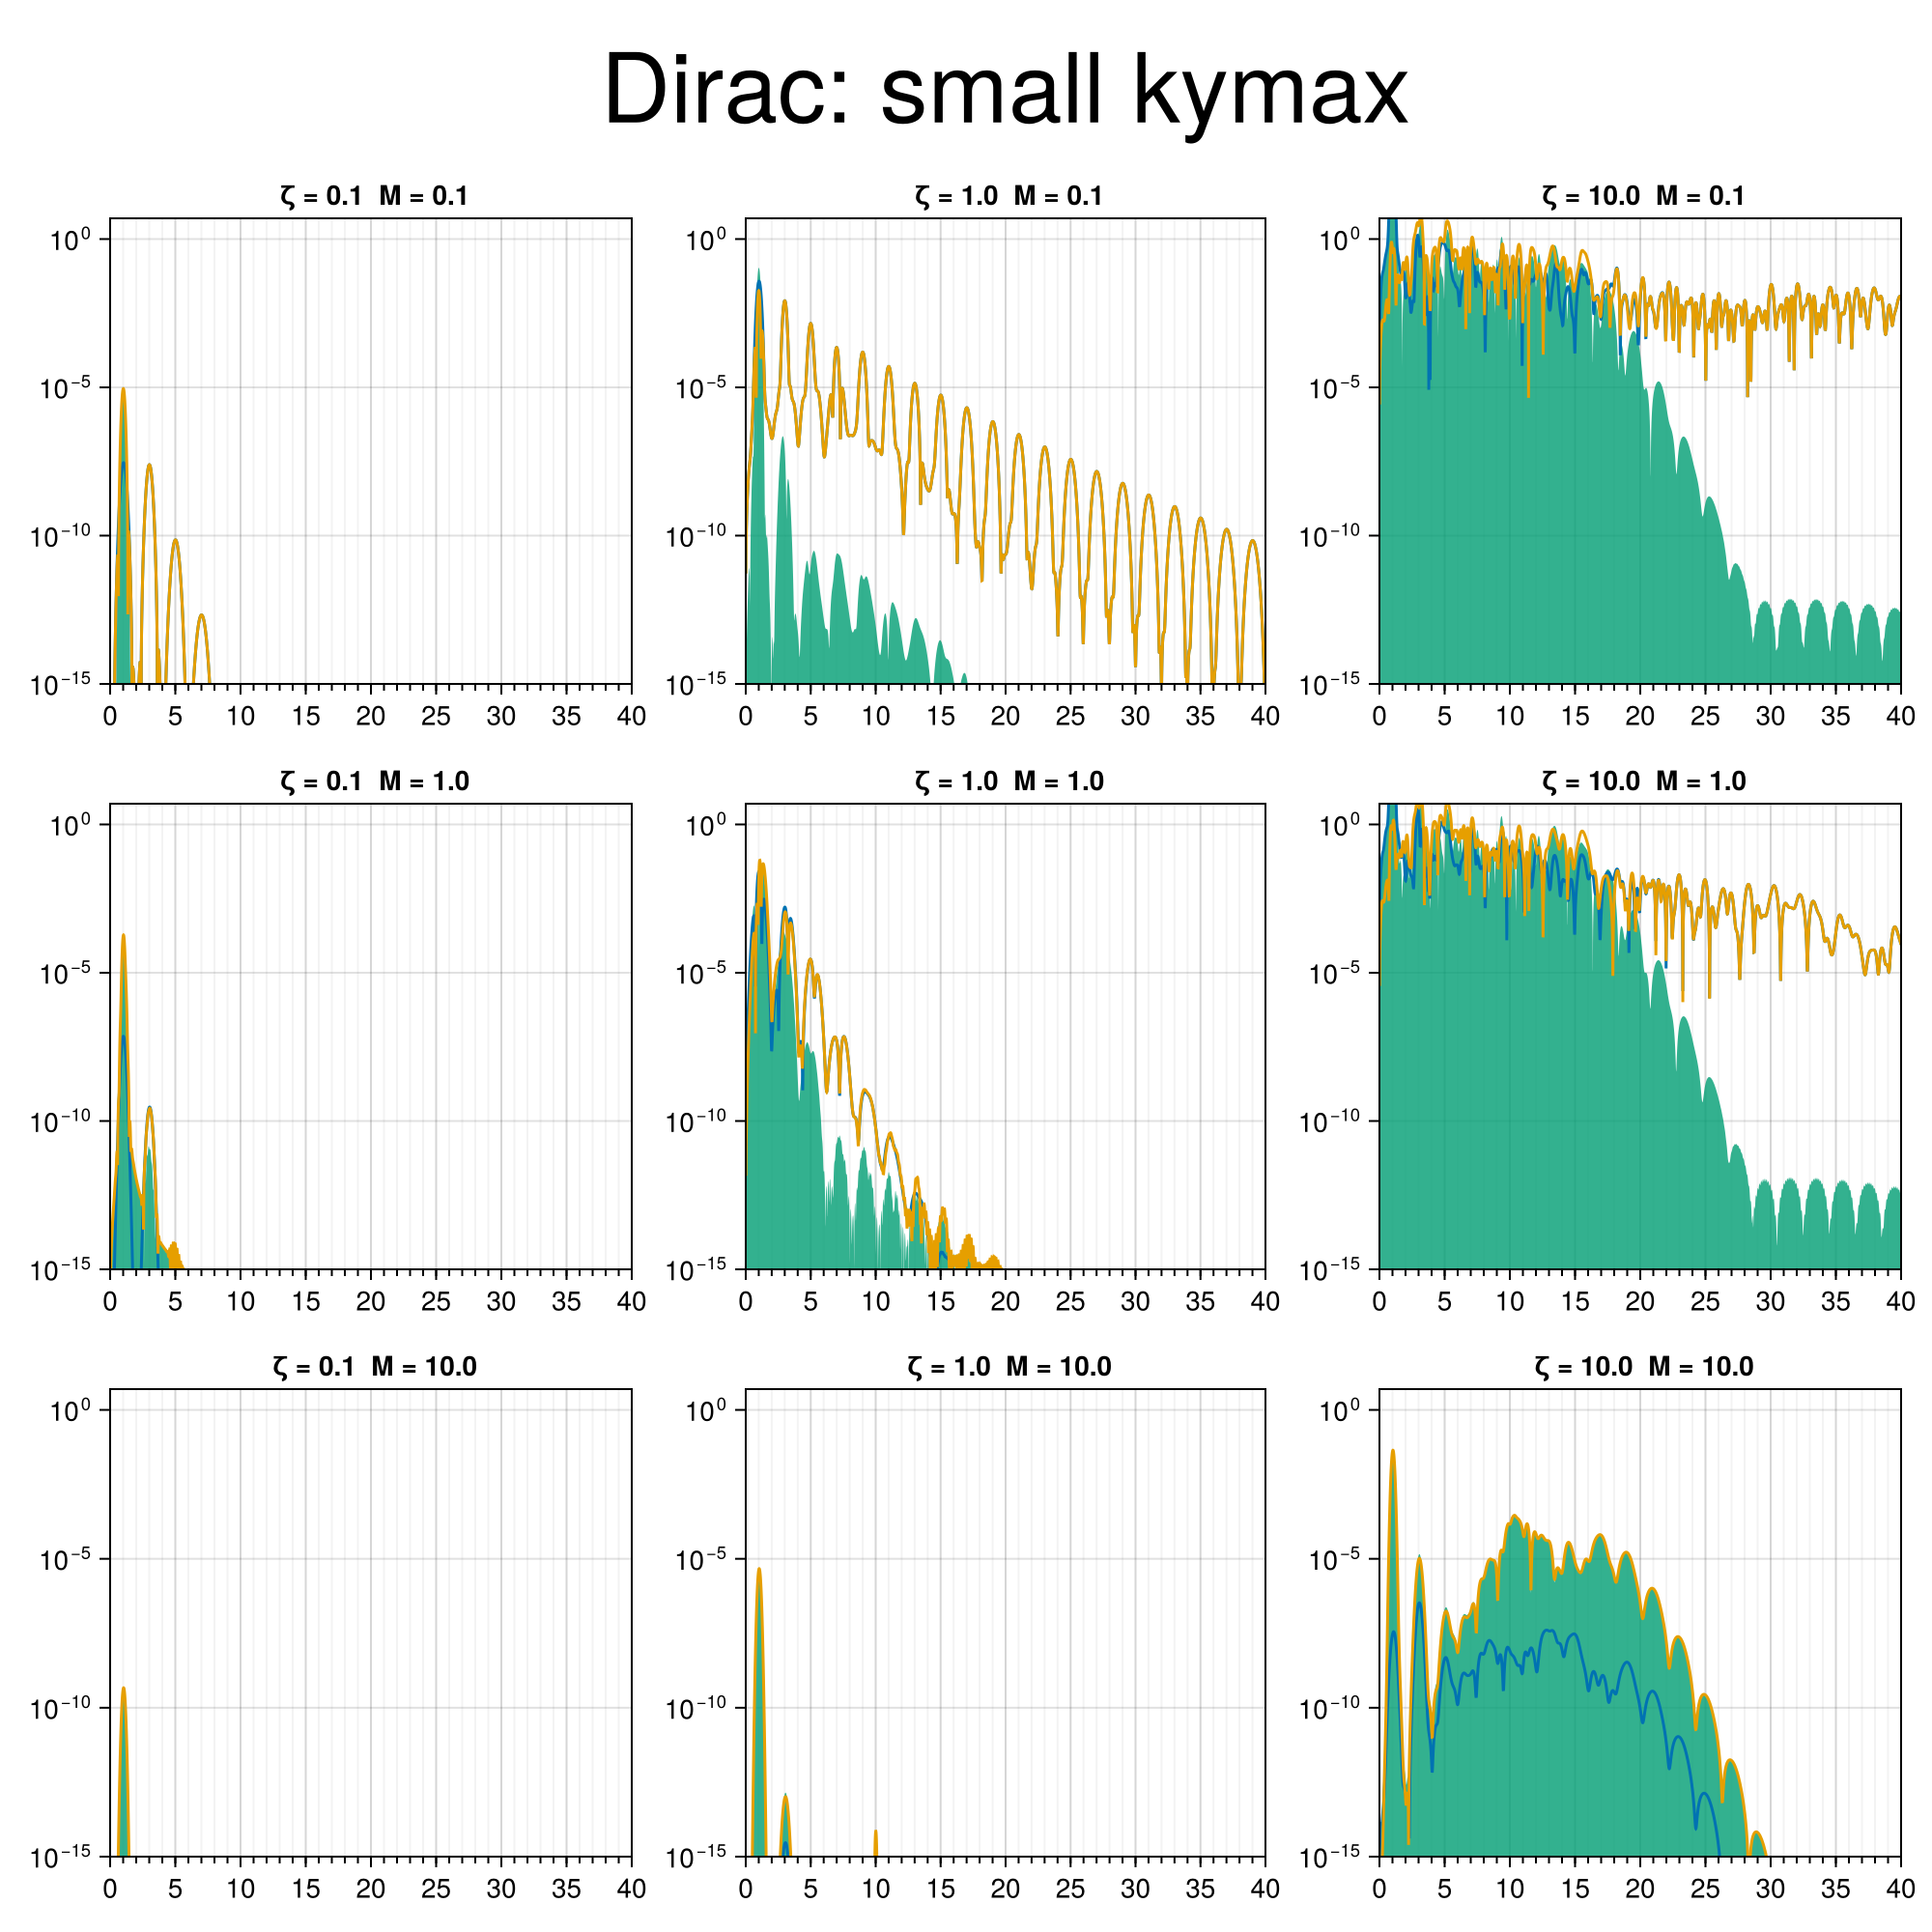

In [17]:
fig   = Figure(size=(1000,1000))
ii = CartesianIndices((1:3,1:3))
maxharm = 40
for i in 1:9
    ζ,M = match(r"zeta=([0-9.]+)_M=([0-9.]+)",diracfiles[i]).captures
    p = getparams(diracsims[i])
    v = diracvels[i]
    specdata = [Damysos.calculate_spectrum(data,p.dt) for data in [v.vx,v.vxintra,v.vxinter]]
    specdata = [(data[1][data[2] .> 1e-50],data[2][data[2] .> 1e-50]) for data in specdata]

    # norm = maximum(specdata[1][2])
    norm = 1.0

    ax  = Axis(fig[ii[i][1],ii[i][2]],
        title=" ζ = $ζ  M = $M",
        yscale=log10,
        xminorticksvisible=true,
        xminorgridvisible=true,
        xminorticks=0:1:maxharm,
        xticks=0:5:maxharm)
    band!(ax,specdata[1][1],fill(1e-50,length(specdata[1][1])),specdata[1][2] ./norm,color=Cycled(3))
    for data in specdata[2:3]
        lines!(ax,data[1],data[2] ./ norm)
    end
    xlims!(ax,(0,40))
    ylims!(ax,(1e-15,5))
end

fig[0,:] = Label(fig,"Dirac: small kymax",fontsize=50)
CairoMakie.save("zeta-m-plane-plots/allspectra-dirac-small-kymax.png",fig,px_per_unit=5)
fig

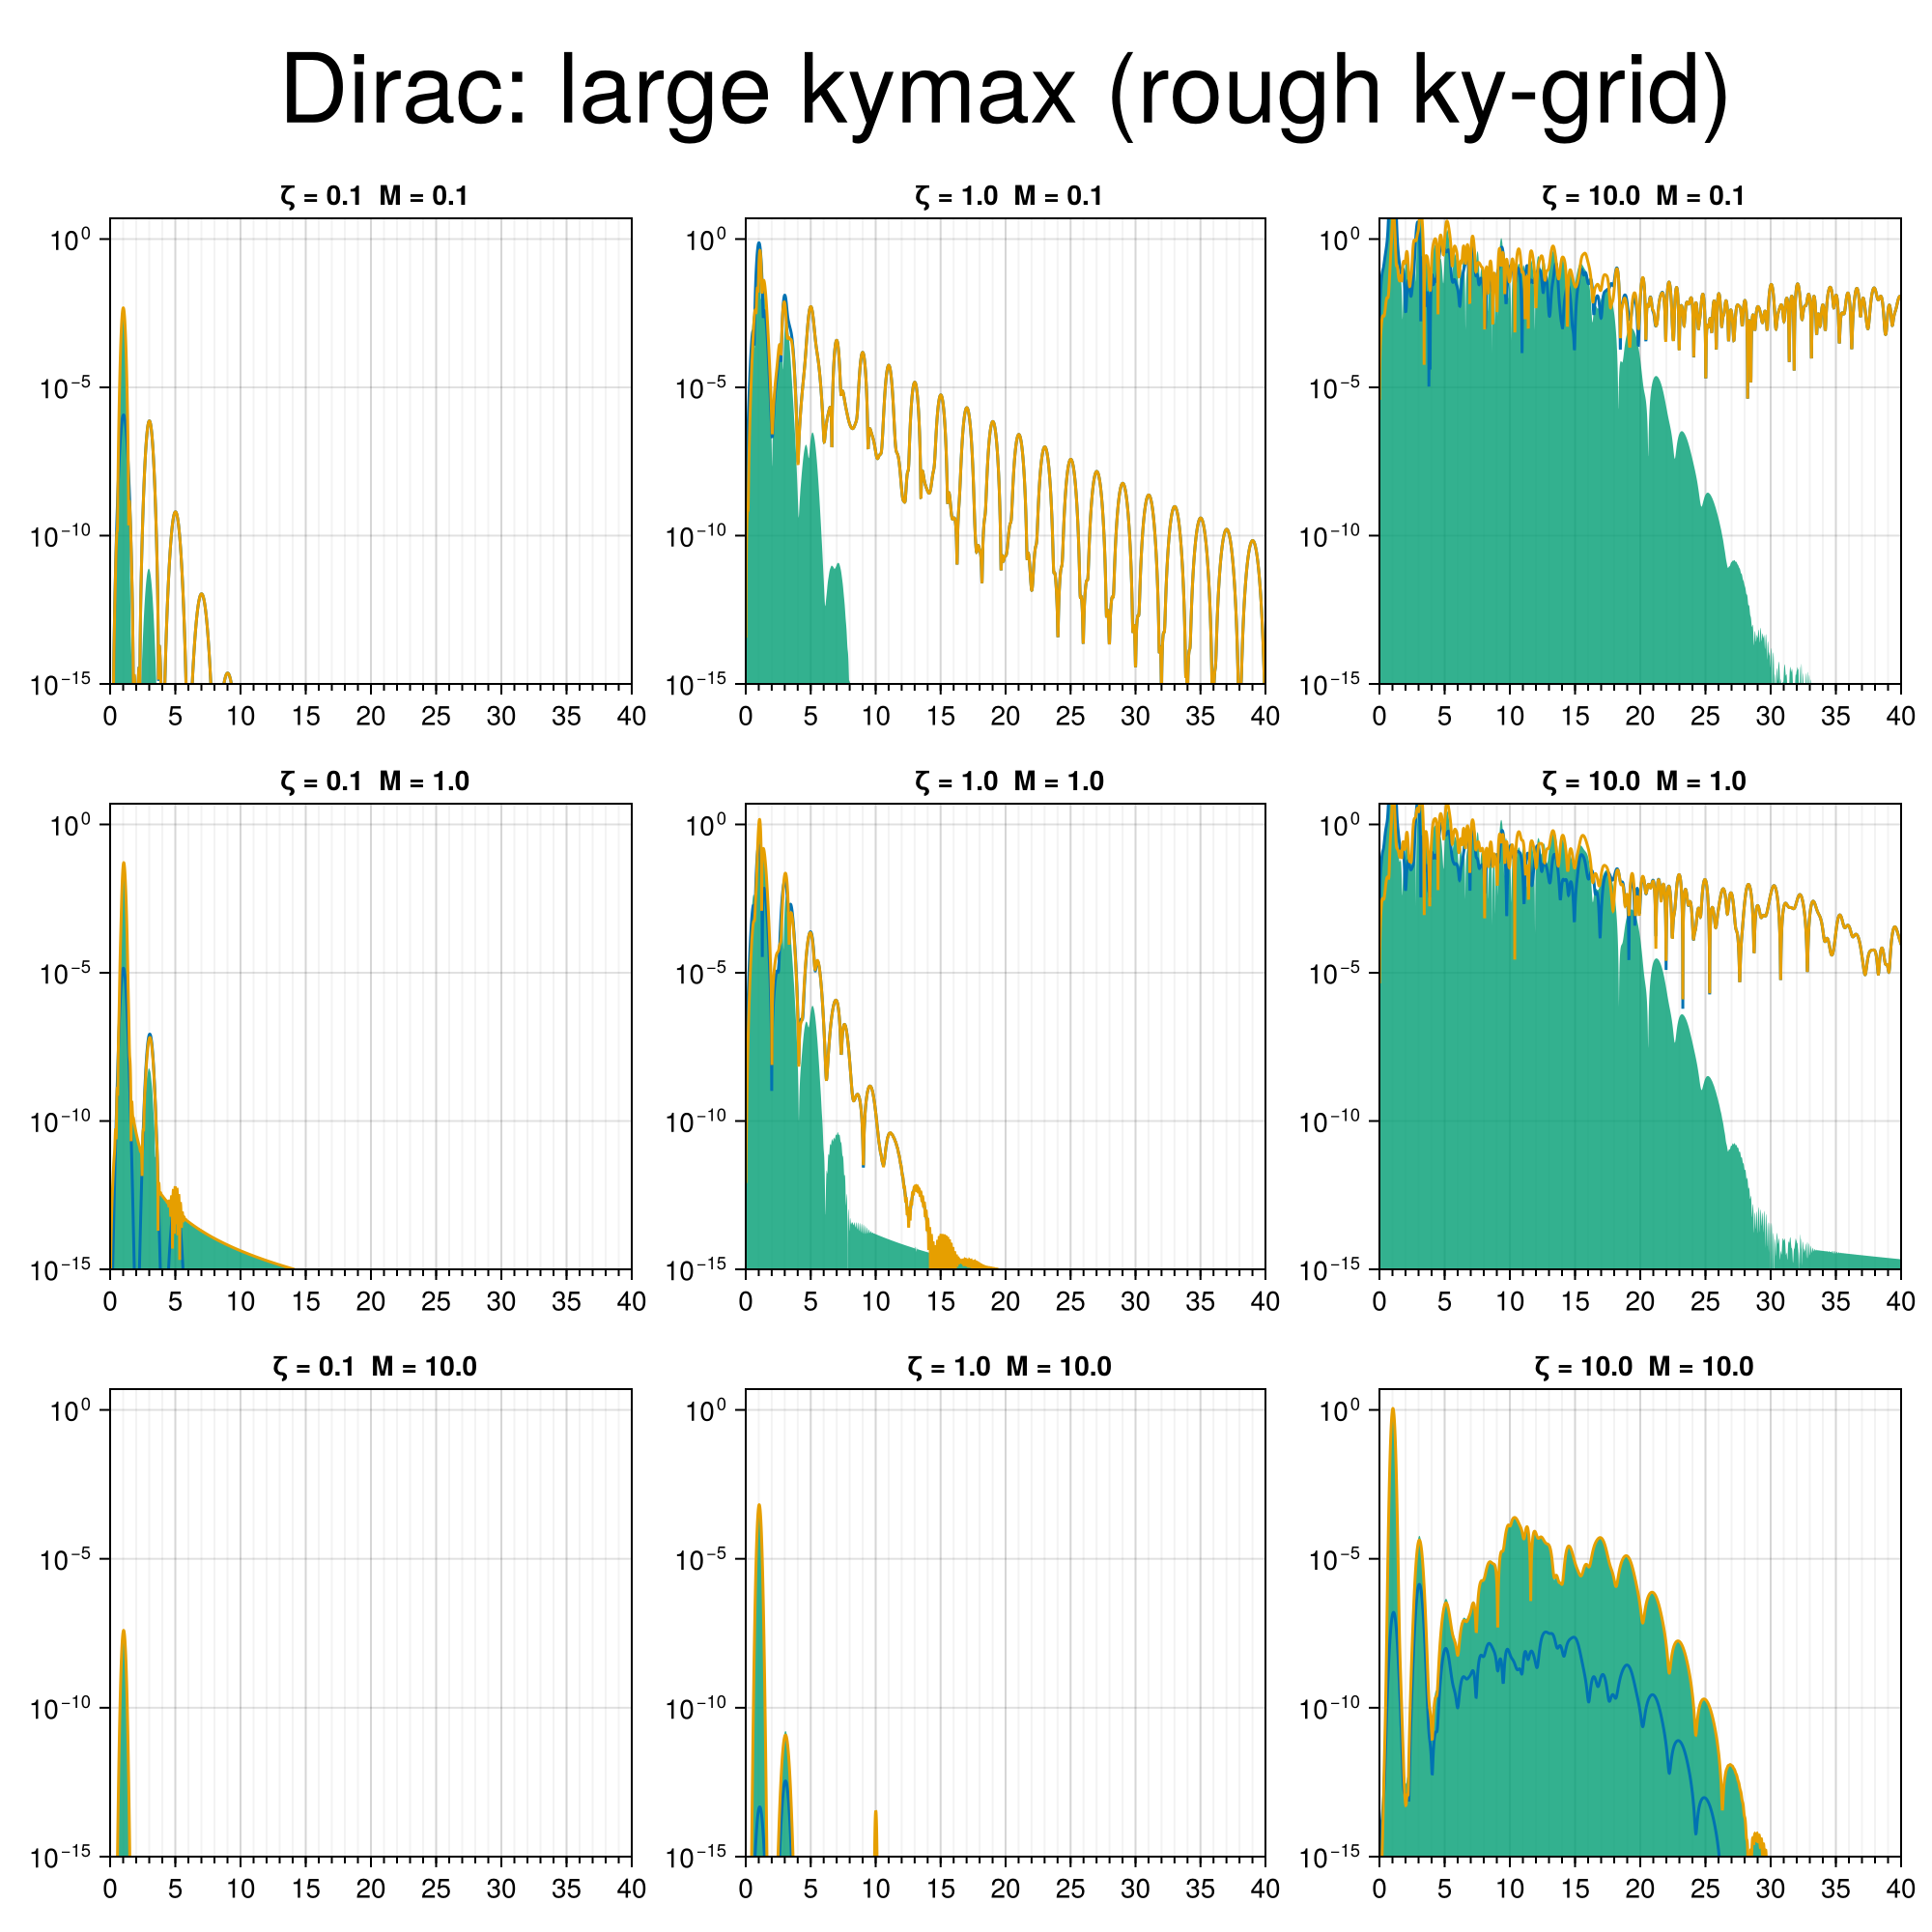

In [16]:
fig   = Figure(size=(1000,1000))
ii = CartesianIndices((1:3,1:3))
maxharm = 40
for i in 1:9
    ζ,M = match(r"zeta=([0-9.]+)_M=([0-9.]+)",dirac_kymaxfiles[i]).captures
    p = getparams(dirac_kymaxsims[i])
    v = dirac_kymaxvels[i]
    specdata = [Damysos.calculate_spectrum(data,p.dt) for data in [v.vx,v.vxintra,v.vxinter]]
    specdata = [(data[1][data[2] .> 1e-50],data[2][data[2] .> 1e-50]) for data in specdata]

    # norm = maximum(specdata[1][2])
    norm = 1.0

    ax  = Axis(fig[ii[i][1],ii[i][2]],
        title=" ζ = $ζ  M = $M",
        yscale=log10,
        xminorticksvisible=true,
        xminorgridvisible=true,
        xminorticks=0:1:maxharm,
        xticks=0:5:maxharm)
    band!(ax,specdata[1][1],fill(1e-50,length(specdata[1][1])),specdata[1][2] ./norm,color=Cycled(3))
    for data in specdata[2:3]
        lines!(ax,data[1],data[2] ./ norm)
    end
    xlims!(ax,(0,40))
    ylims!(ax,(1e-15,5))
end

fig[0,:] = Label(fig,"Dirac: large kymax (rough ky-grid)",fontsize=50)
CairoMakie.save("zeta-m-plane-plots/allspectra-dirac-large-kymax.png",fig,px_per_unit=5)
fig

# Dirac: Full 2D Fermi-sea

## Load Fermi-sea data

In [ ]:
dirac_kymaxpath = "/home/how09898/phd/data/dirac/zeta-M-sweep1/9x9_final2d_1e-2"
dirac_kymaxfiles = load_hdf5_files(dirac_kymaxpath)
dirac_kymaxsims = Damysos.loadlast_testsim.(dirac_kymaxfiles)
dirac_kymaxvels = [s.observables[2] for s in dirac_kymaxsims]

┌ Info: 9 files found.
└ @ Main /home/how09898/dev/Damysos/jupyter/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sdnNjb2RlLXJlbW90ZQ==.jl:8


ErrorException: No completed simulation found (test.completedsims is empty)

In [30]:
using HDF5

file = h5open(dirac_kymaxfiles[9])
@show read(file["testresult/retcode"])
close(file)

read(file["testresult/retcode"]) = 0


In [ ]:
diracpath = "/home/how09898/phd/data/dirac/zeta-M-sweep1/dt_1e-4_dkx_1e-2_dky_1e-2_kxmax_1e-2"
diracfiles = load_hdf5_files(diracpath)
diracsims = Damysos.loadlast_testsim.(diracfiles)

┌ Info: 9 files found.
└ @ Main /home/how09898/.julia/dev/Damysos/jupyter/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sdnNjb2RlLXJlbW90ZQ==.jl:8
┌ Info: 9 files found.
└ @ Main /home/how09898/.julia/dev/Damysos/jupyter/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sdnNjb2RlLXJlbW90ZQ==.jl:8


9-element Vector{Simulation{Float64}}:
 Simulation{Float64}(TwoBandDephasingLiouvillian{Float64}(QuadraticToy{Float64}(0.6283185307179587, 0.10000000000000005), Inf, Inf), GaussianAPulse{Float64}(1.5, 6.283185307179586, 15.749609945722415, 0.0, 0.0), NumericalParams2d{Float64}(0.007519884823892999, 1.0, 33.689084011040634, 1.0, 0.00625, -7.5, 1.0e-10, 1.0e-12), Damysos.Observable{Float64}[Occupation{Float64}([0.0, 6.002767714383796e-16, 2.259251656933519e-15, 4.7587440689320036e-15, 7.875861719506308e-15, 1.1386398912448505e-14, 1.5068584354545353e-14, 1.8707174491085935e-14, 2.209788509833014e-14, 2.505215038858135e-14  …  0.04676325745331787, 0.046763257453416994, 0.04676325745353884, 0.04676325745368186, 0.04676325745384445, 0.046763257454024945, 0.04676325745422163, 0.04676325745443278, 0.04676325745465663, 0.04676325745489142]), Velocity{Float64}([5.197241293064222e-16, 6.129447336077397e-9, 1.1888825192502846e-8, 1.724863697280031e-8, 2.2179531689870653e-8, 2.665242740047234e-8, 

In [ ]:
diracvels = [s.observables[2] for s in diracsims]

9-element Vector{Velocity{Float64}}:
 Velocity{Float64}([5.197241293064222e-16, 6.129447336077397e-9, 1.1888825192502846e-8, 1.724863697280031e-8, 2.2179531689870653e-8, 2.665242740047234e-8, 3.063855867335858e-8, 3.4109470092725725e-8, 3.703694869407643e-8, 3.939295752615183e-8  …  -1.1284518415635624e-5, -1.115681424944365e-5, -1.1013987167774636e-5, -1.0856433994813444e-5, -1.0684569919283665e-5, -1.0498827626075225e-5, -1.0299656396428667e-5, -1.0087521203095448e-5, -9.862901782716986e-6, -9.62629169564371e-6], [5.197241293064222e-16, 8.662068821773704e-16, 1.2126896350483186e-15, 1.0394482586128444e-15, 6.063448175241593e-16, 9.528275703951073e-16, 5.197241293064222e-16, 1.2993103232660555e-15, 5.197241293064222e-16, 6.063448175241593e-16  …  4.084028857303051e-8, 4.031833846527827e-8, 3.967523286712276e-8, 3.8917501159421144e-8, 3.8051632097927826e-8, 3.708405423701887e-8, 3.602113159865764e-8, 3.486914851377434e-8, 3.363430199964543e-8, 3.2322694137273104e-8], [0.0, 6.1294465180

# Quadratic

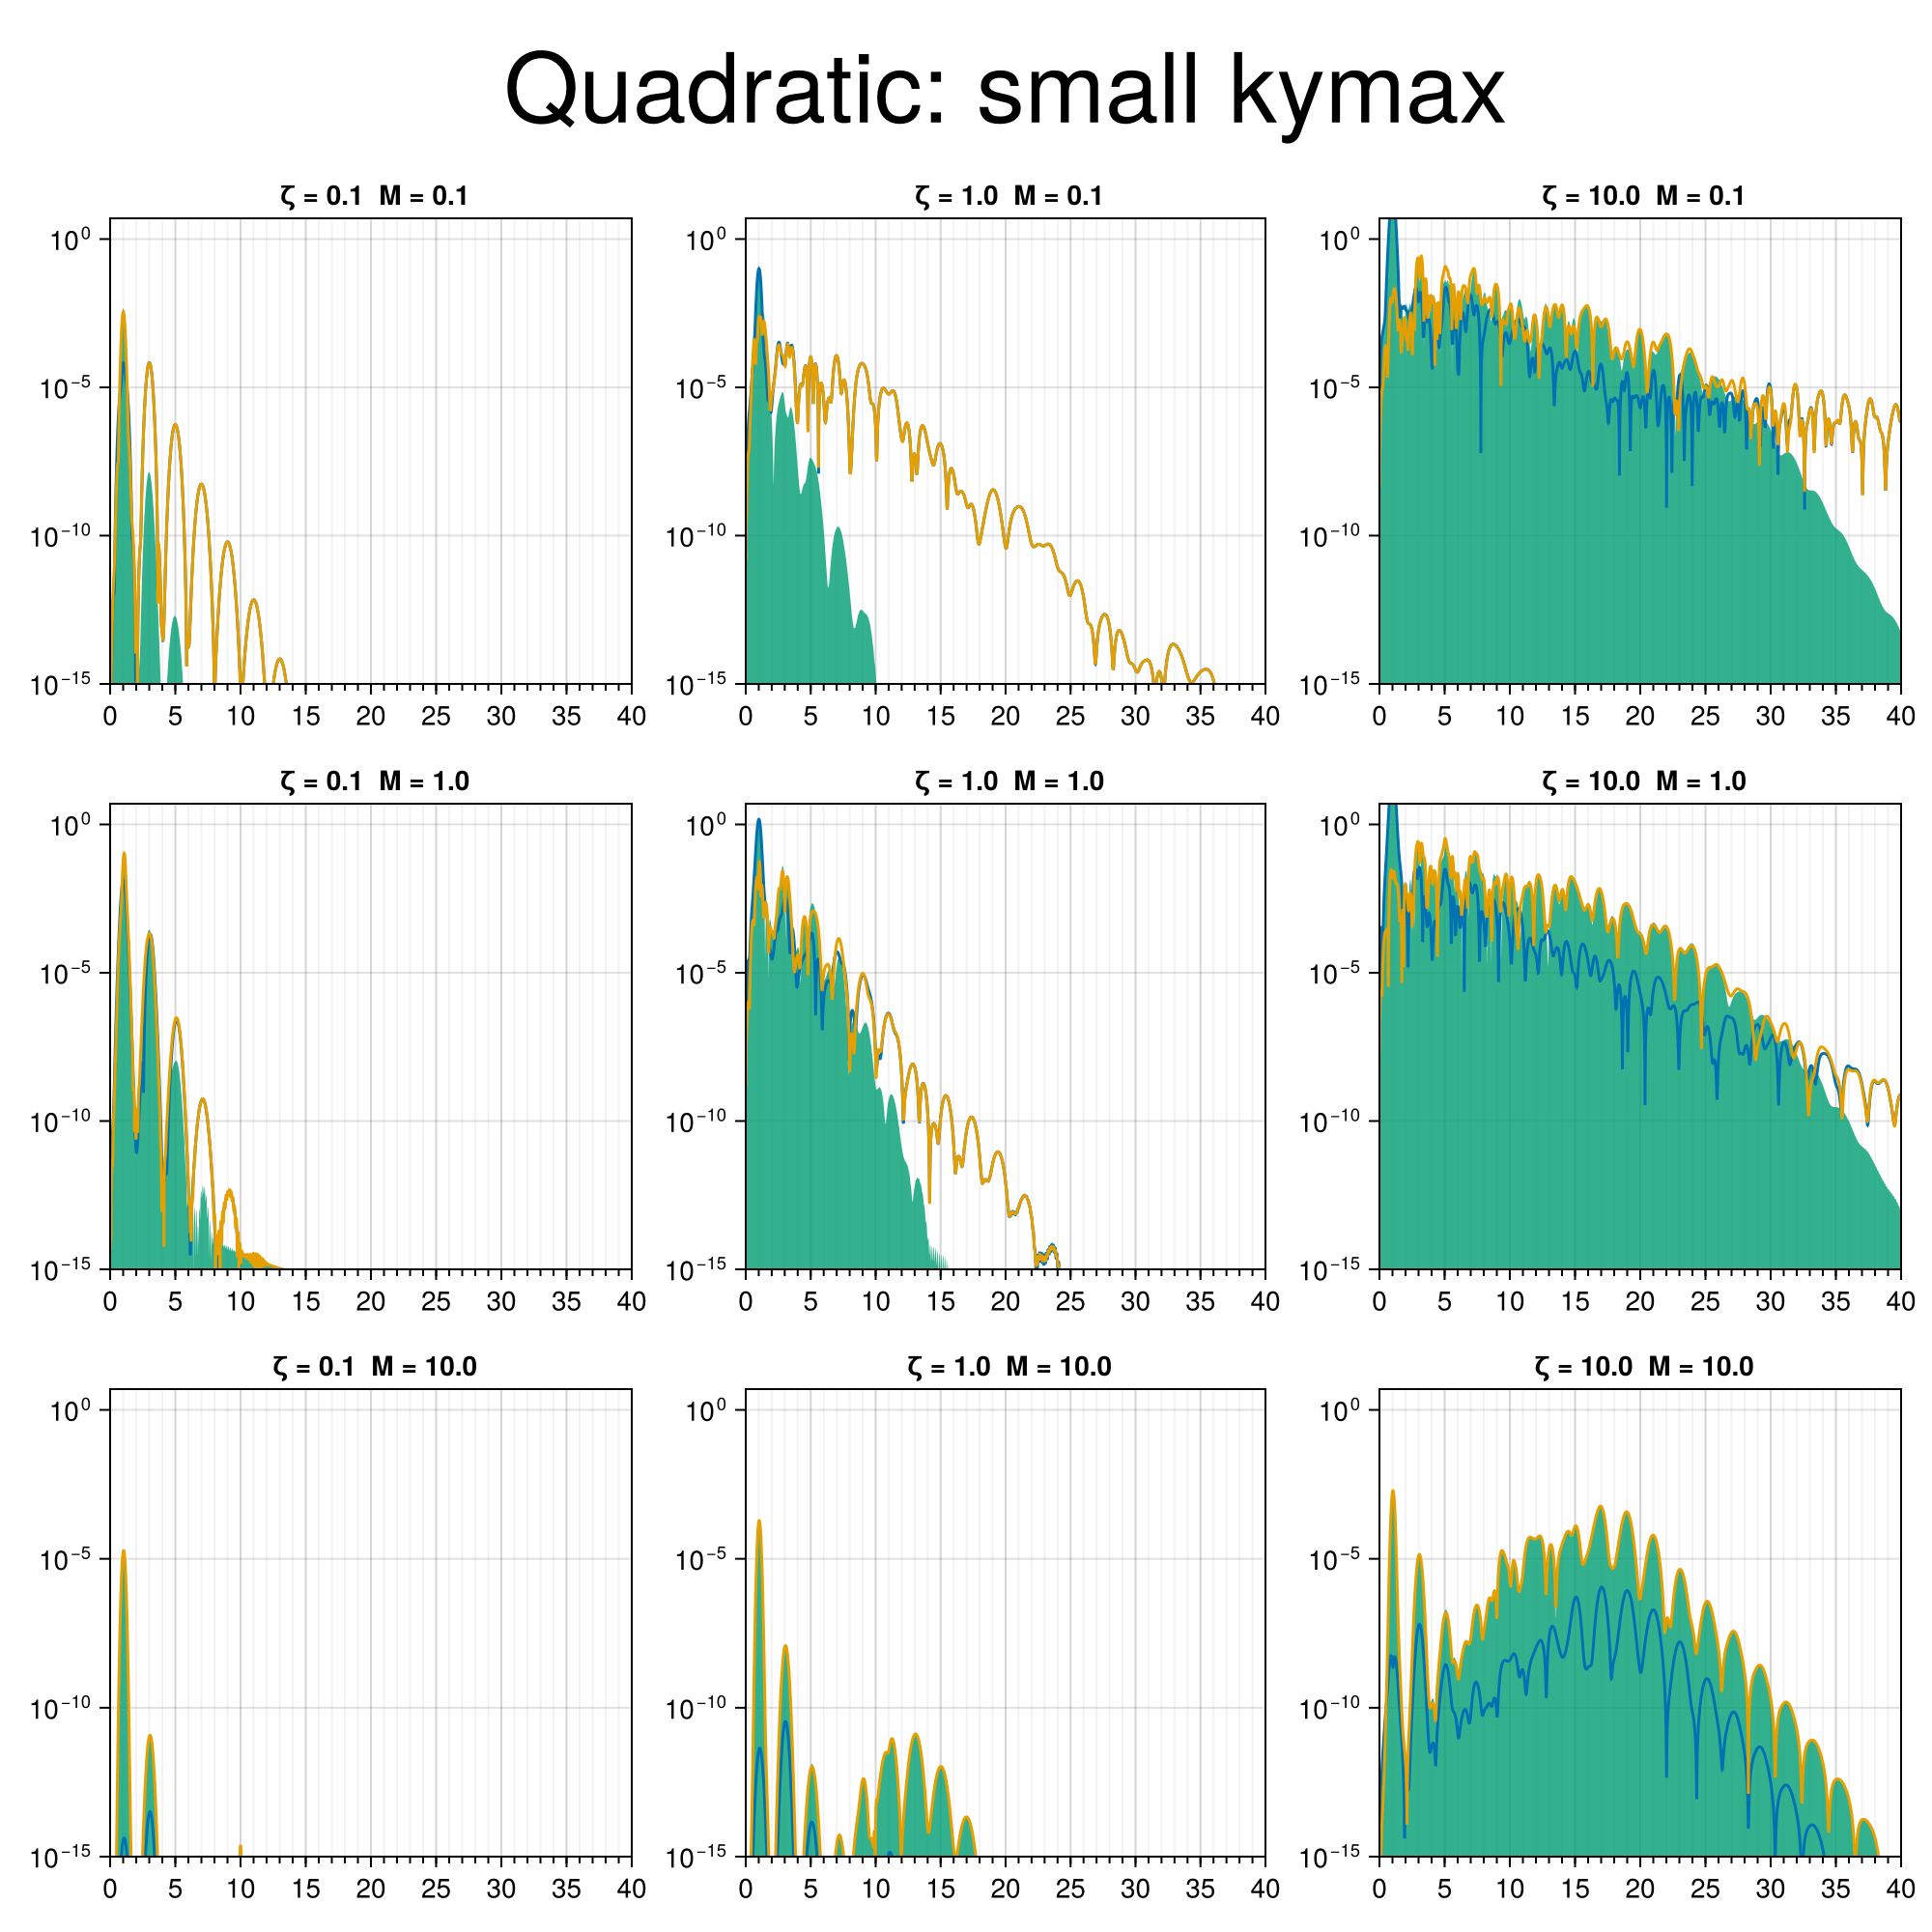

In [15]:
fig   = Figure(size=(1000,1000))
ii = CartesianIndices((1:3,1:3))
for i in 1:9
    ζ,M = match(r"zeta=([0-9.]+)_M=([0-9.]+)",quadfiles[i]).captures
    p = getparams(quadsims[i])
    v = quadvels[i]
    specdata = [Damysos.calculate_spectrum(data,p.dt) for data in [v.vx,v.vxintra,v.vxinter]]
    specdata = [(data[1][data[2] .> 1e-50],data[2][data[2] .> 1e-50]) for data in specdata]

    # norm = maximum(specdata[1][2])
    norm = 1.0

    ax  = Axis(fig[ii[i][1],ii[i][2]],
        title=" ζ = $ζ  M = $M",
        yscale=log10,
        xminorticksvisible=true,
        xminorgridvisible=true,
        xminorticks=0:1:maxharm,
        xticks=0:5:maxharm)
    band!(ax,specdata[1][1],fill(1e-50,length(specdata[1][1])),specdata[1][2] ./norm,color=Cycled(3))
    for data in specdata[2:3]
        lines!(ax,data[1],data[2] ./ norm)
    end
    xlims!(ax,(0,40))
    ylims!(ax,(1e-15,5))
end

fig[0,:] = Label(fig,"Quadratic: small kymax",fontsize=50)
CairoMakie.save("zeta-m-plane-plots/allspectra-quadratic-small-kymax.png",fig,px_per_unit=5)
fig

# Compare large & small kymax for Dirac

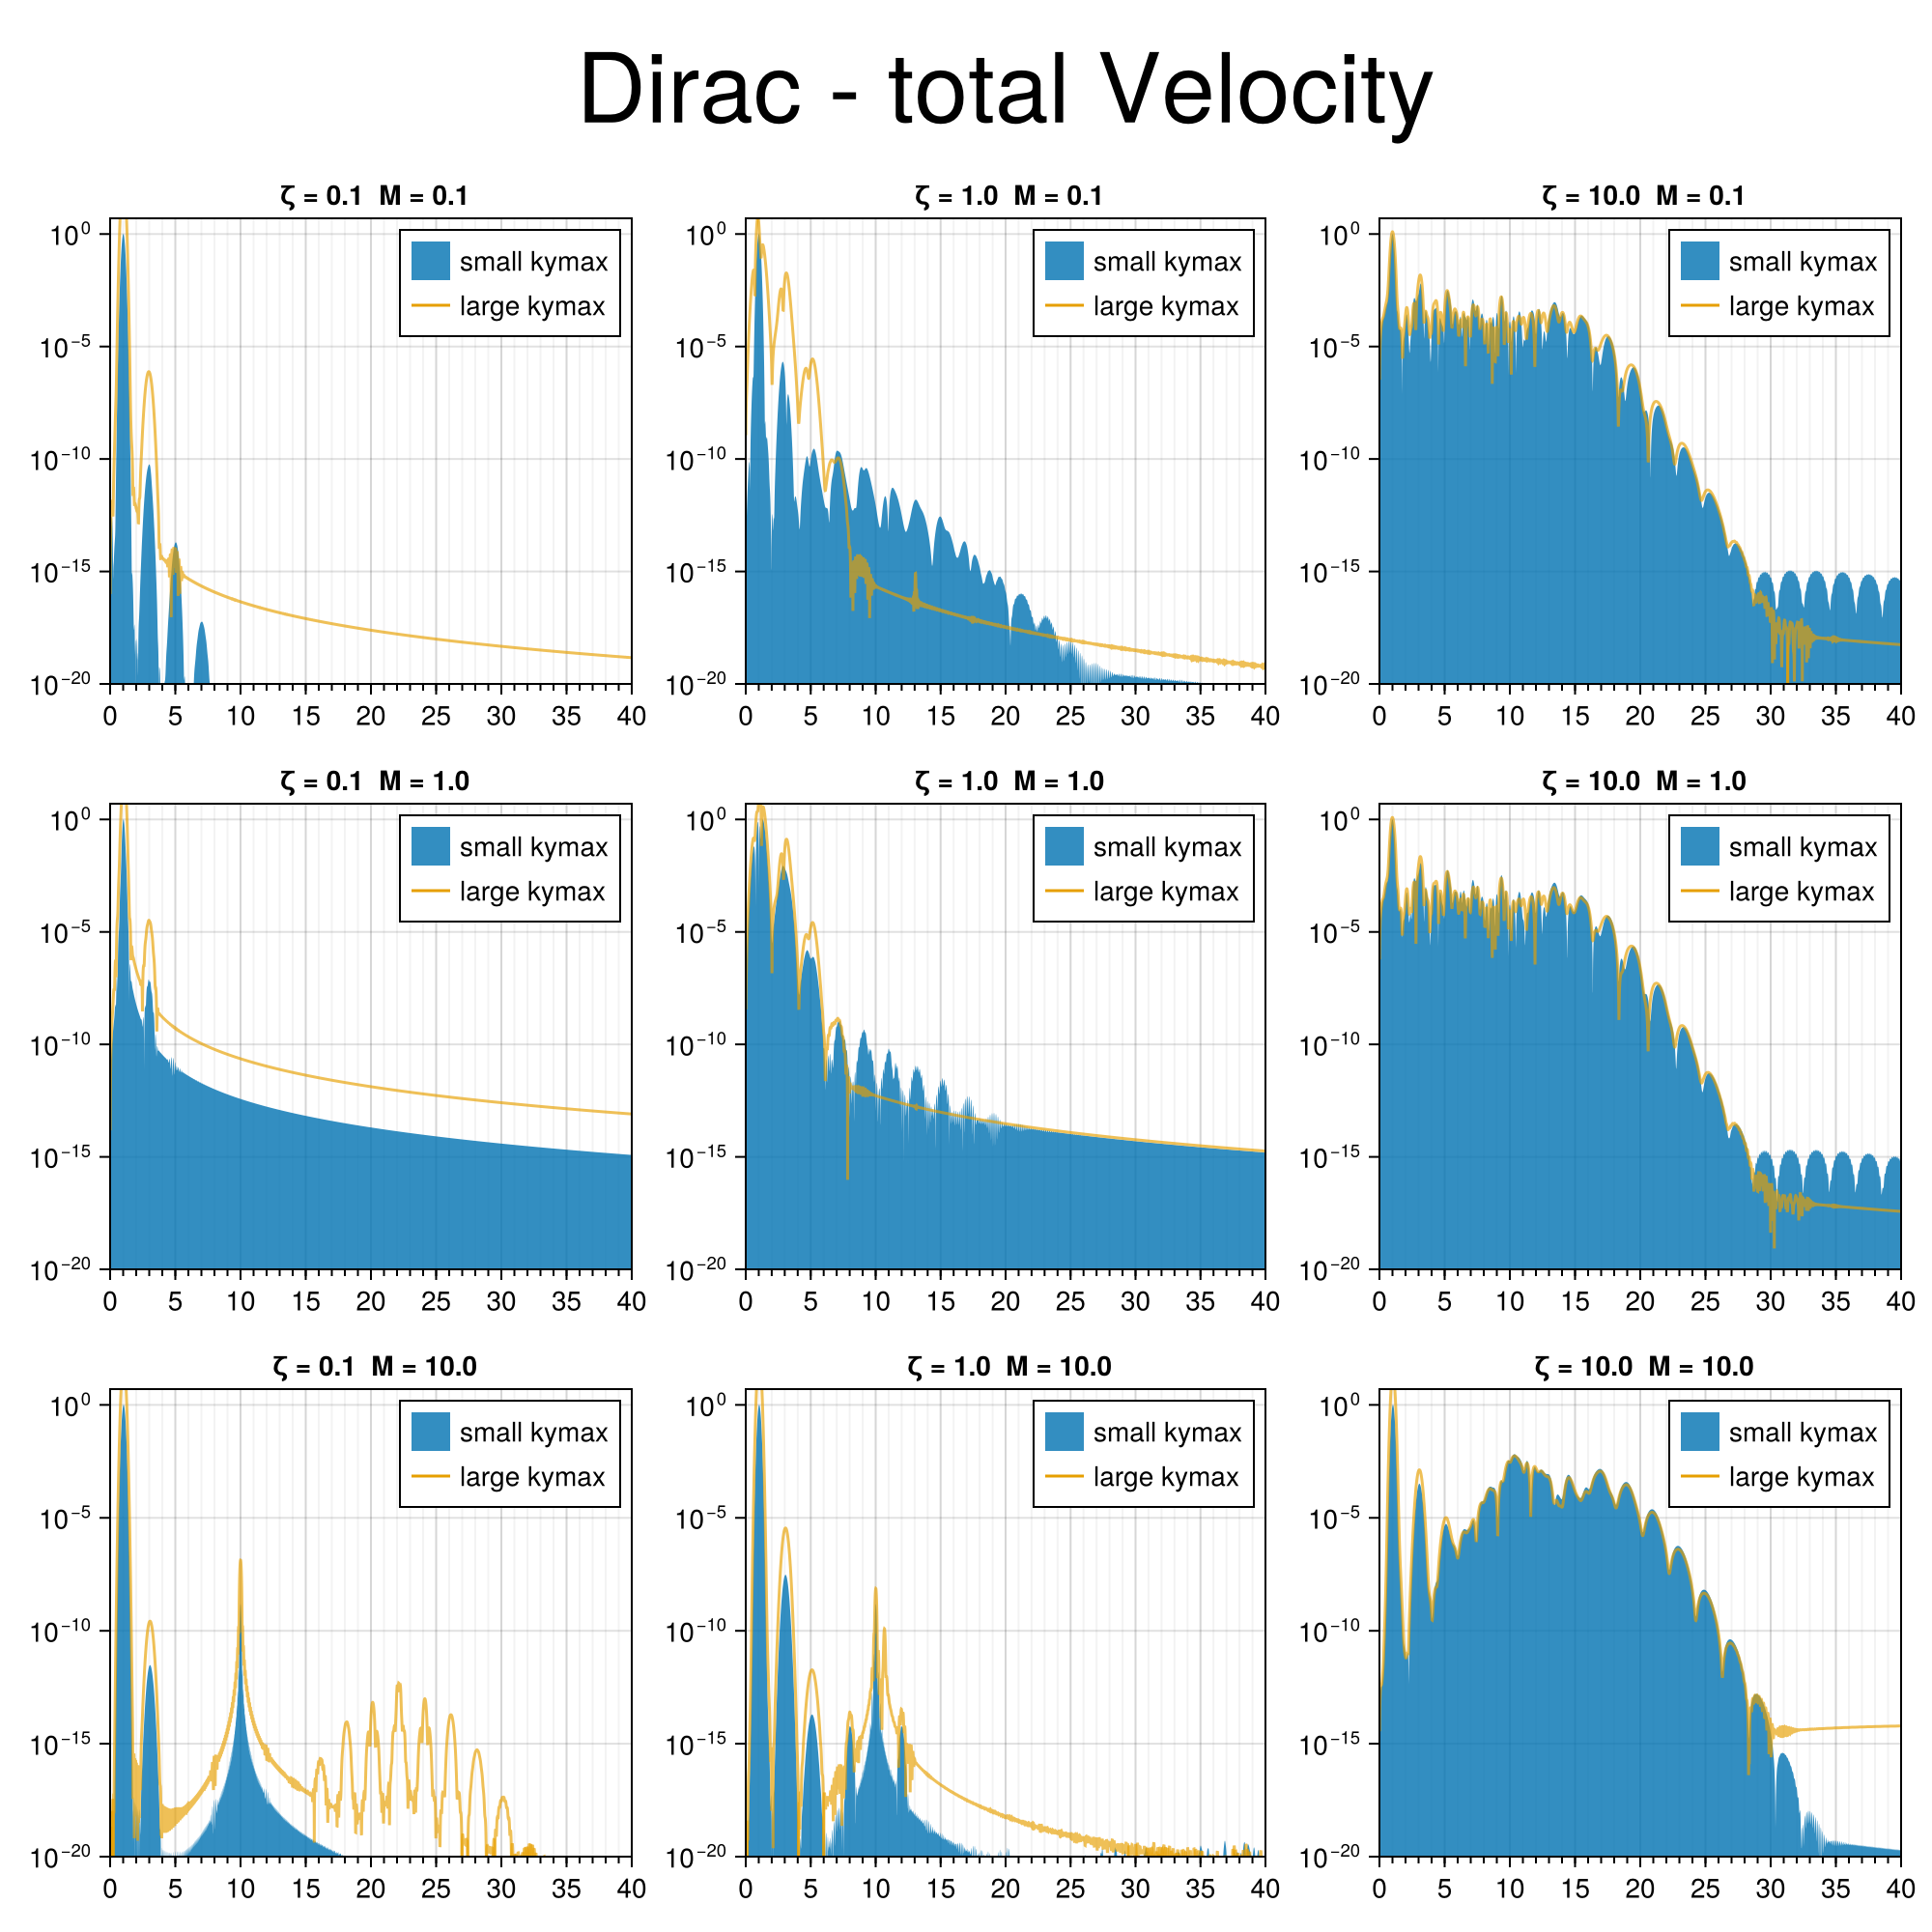

In [12]:
fig   = Figure(size=(1000,1000))
ii = CartesianIndices((1:3,1:3))
maxharm = 40
for i in 1:9
    ζ,M = match(r"zeta=([0-9.]+)_M=([0-9.]+)",diracfiles[i]).captures
    p = getparams(diracsims[i])
    v = diracvels[i]
    v2 = dirac_kymaxvels[i]
    specdata = [Damysos.calculate_spectrum(data,p.dt) for data in [v.vx,v.vxintra,v.vxinter]]
    specdata = [(data[1][data[2] .> 1e-50],data[2][data[2] .> 1e-50]) for data in specdata]

    specdata2 = [Damysos.calculate_spectrum(data,p.dt) for data in [v2.vx,v2.vxintra,v2.vxinter]]
    specdata2 = [(data[1][data[2] .> 1e-50],data[2][data[2] .> 1e-50]) for data in specdata2]

    norm = maximum(specdata[1][2])
    # norm2 = maximum(specdata2[1][2])
    norm2 = norm

    ax  = Axis(fig[ii[i][1],ii[i][2]],
        title=" ζ = $ζ  M = $M",
        yscale=log10,
        xminorticksvisible=true,
        xminorgridvisible=true,
        xminorticks=0:1:maxharm,
        xticks=0:5:maxharm)
    band!(ax,specdata[1][1],fill(1e-50,length(specdata[1][1])),specdata[1][2] ./norm,
        color=Cycled(1),
        alpha=1.0,
        label="small kymax")
    lines!(ax,specdata2[1][1],specdata2[1][2] ./norm2,
        color=Cycled(2),
        alpha=0.66,
        label="large kymax")
    xlims!(ax,(0,40))
    ylims!(ax,(1e-20,5))
    axislegend(ax)
end


fig[0,:] = Label(fig,"Dirac - total Velocity",fontsize=50)
CairoMakie.save("zeta-m-plane-plots/spectra-dirac-kymax-total.png",fig,px_per_unit=5)
fig

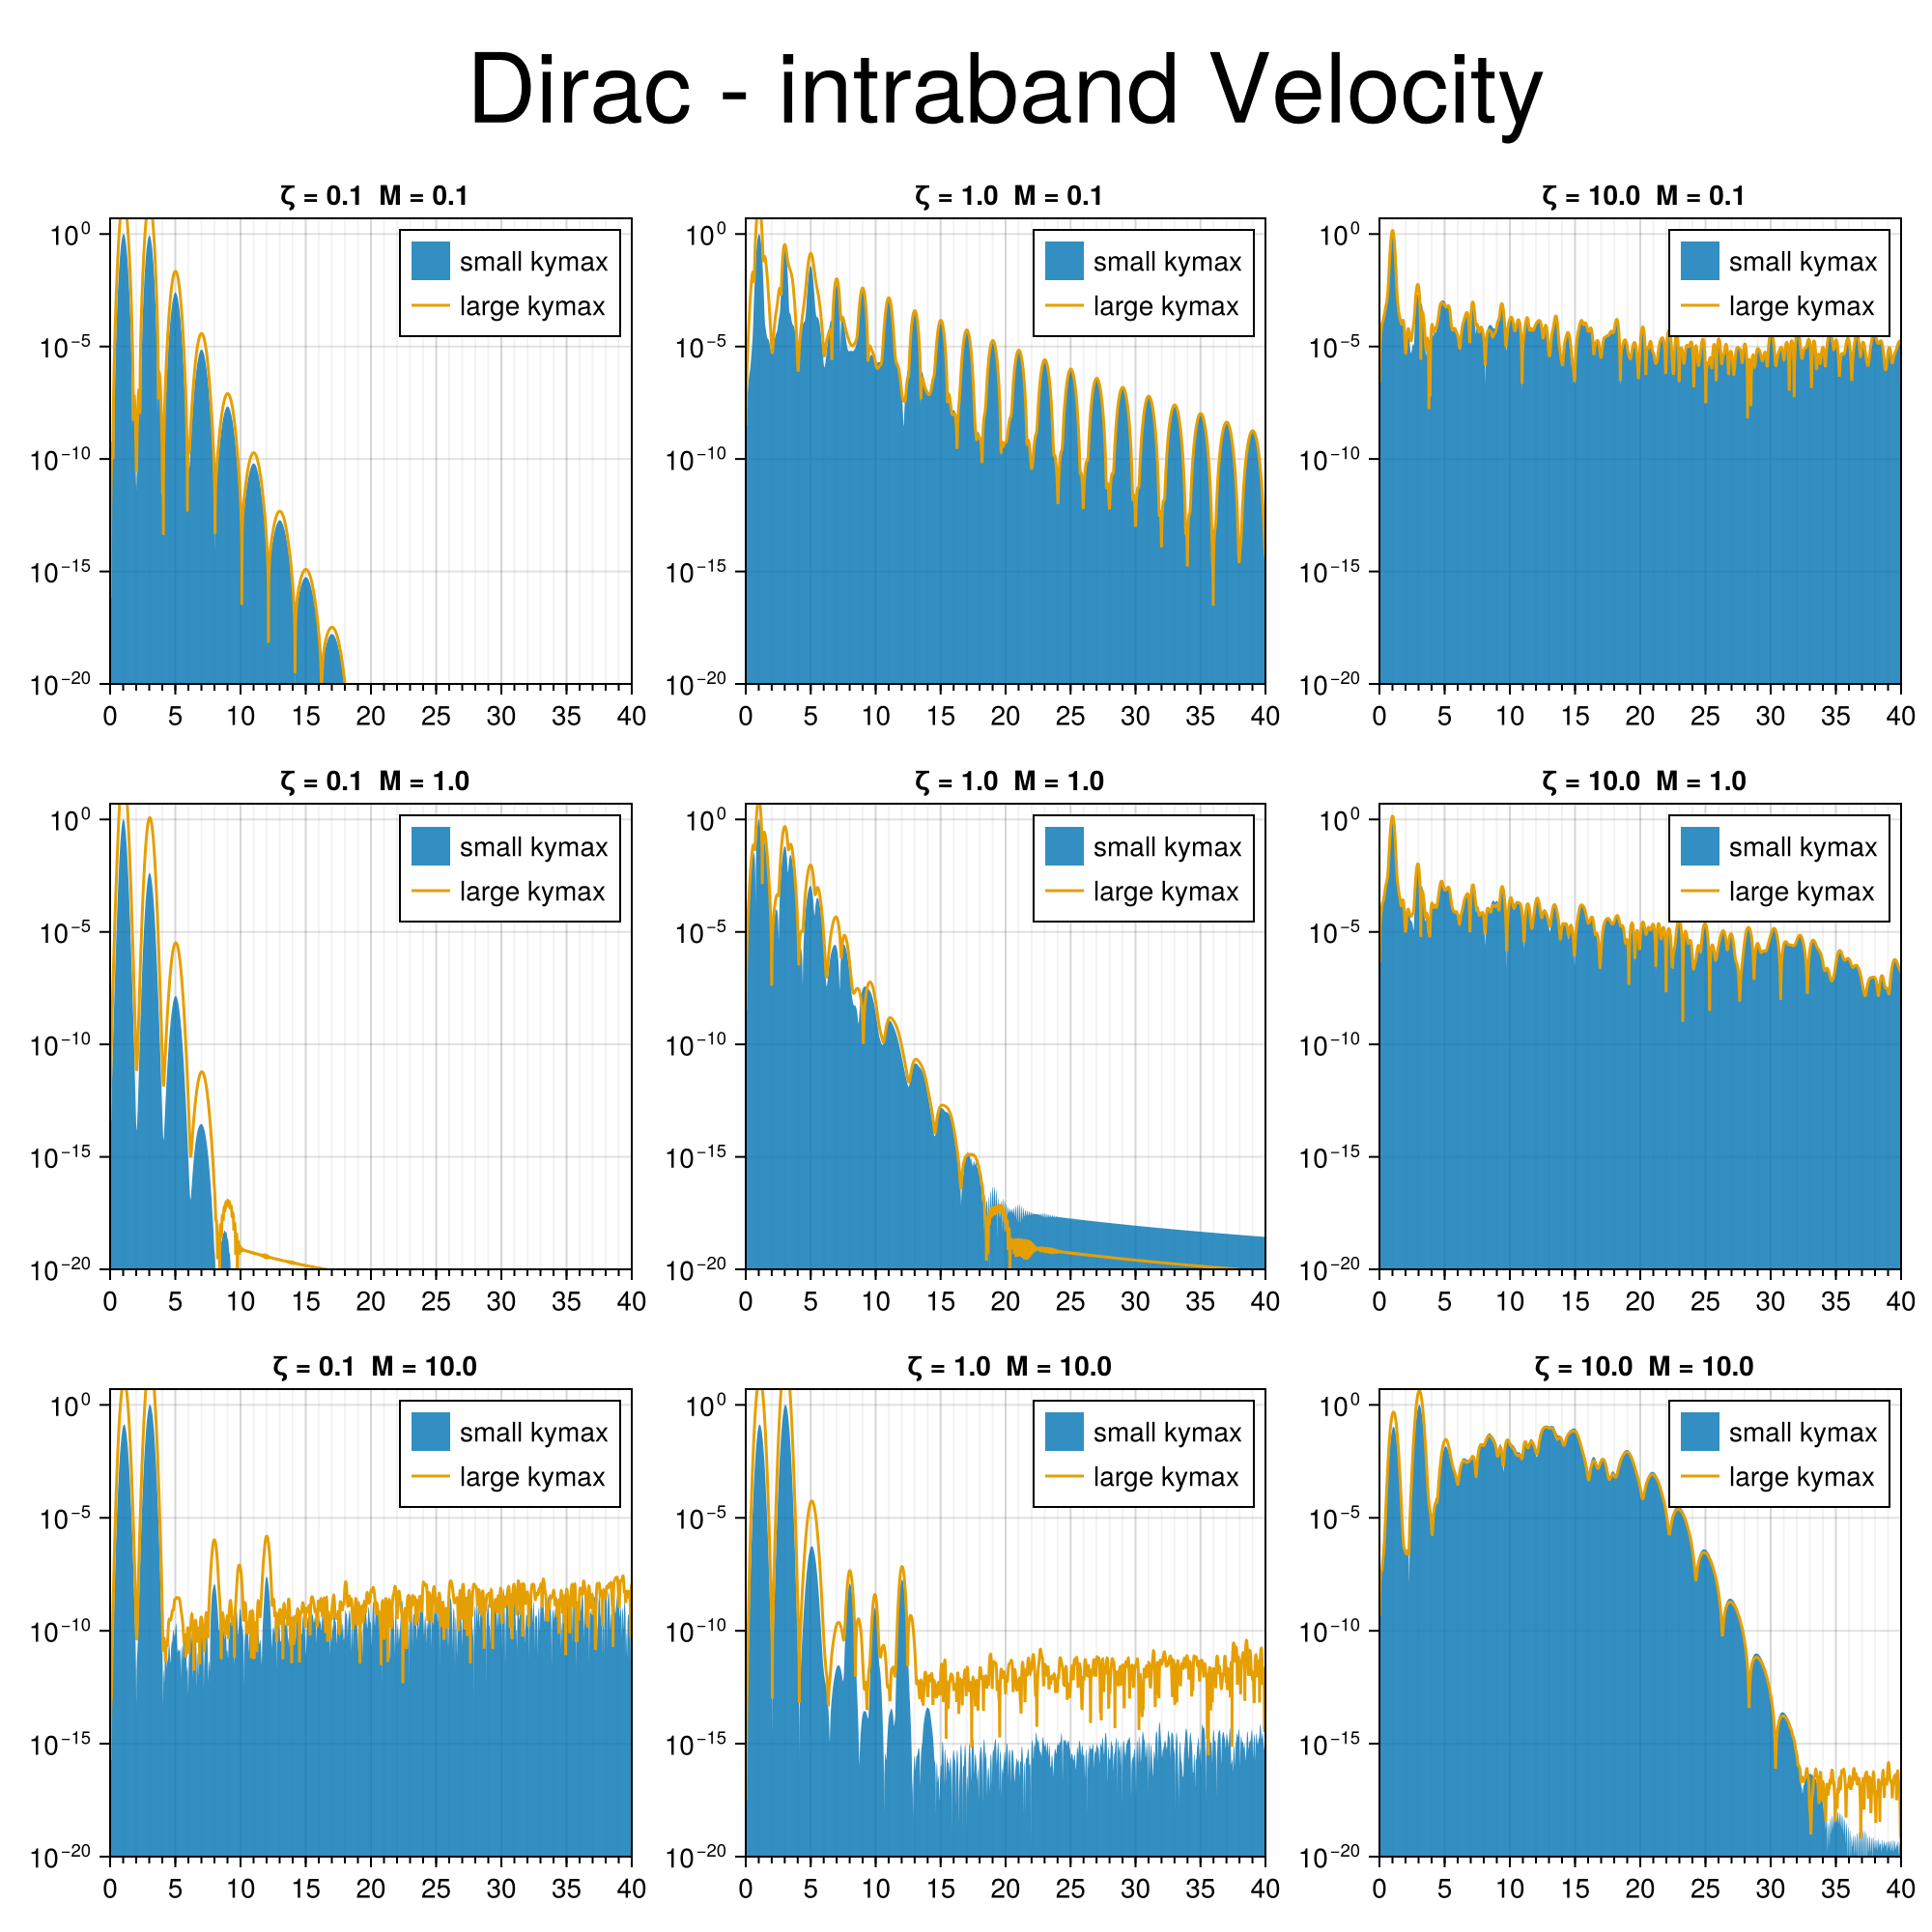

In [14]:
fig   = Figure(size=(1000,1000))
ii = CartesianIndices((1:3,1:3))
maxharm = 40
for i in 1:9
    ζ,M = match(r"zeta=([0-9.]+)_M=([0-9.]+)",diracfiles[i]).captures
    p = getparams(diracsims[i])
    v = diracvels[i]
    v2 = dirac_kymaxvels[i]
    specdata = [Damysos.calculate_spectrum(data,p.dt) for data in [v.vx,v.vxintra,v.vxinter]]
    specdata = [(data[1][data[2] .> 1e-50],data[2][data[2] .> 1e-50]) for data in specdata]

    specdata2 = [Damysos.calculate_spectrum(data,p.dt) for data in [v2.vx,v2.vxintra,v2.vxinter]]
    specdata2 = [(data[1][data[2] .> 1e-50],data[2][data[2] .> 1e-50]) for data in specdata2]

    norm = maximum(specdata[2][2])
    # norm2 = maximum(specdata2[2][2])
    norm2 = norm

    ax  = Axis(fig[ii[i][1],ii[i][2]],
        title=" ζ = $ζ  M = $M",
        yscale=log10,
        xminorticksvisible=true,
        xminorgridvisible=true,
        xminorticks=0:1:maxharm,
        xticks=0:5:maxharm)
    band!(ax,specdata[2][1],fill(1e-50,length(specdata[2][1])),specdata[2][2] ./norm,
        color=Cycled(1),
        alpha=1.0,
        label="small kymax")
    lines!(ax,specdata2[2][1],specdata2[2][2] ./ norm2,color=Cycled(2), label="large kymax")
    xlims!(ax,(0,40))
    ylims!(ax,(1e-20,5))
    axislegend(ax)
end


fig[0,:] = Label(fig,"Dirac - intraband Velocity",fontsize=50)
CairoMakie.save("zeta-m-plane-plots/spectra-dirac-kymax-intra.png",fig,px_per_unit=5)
fig

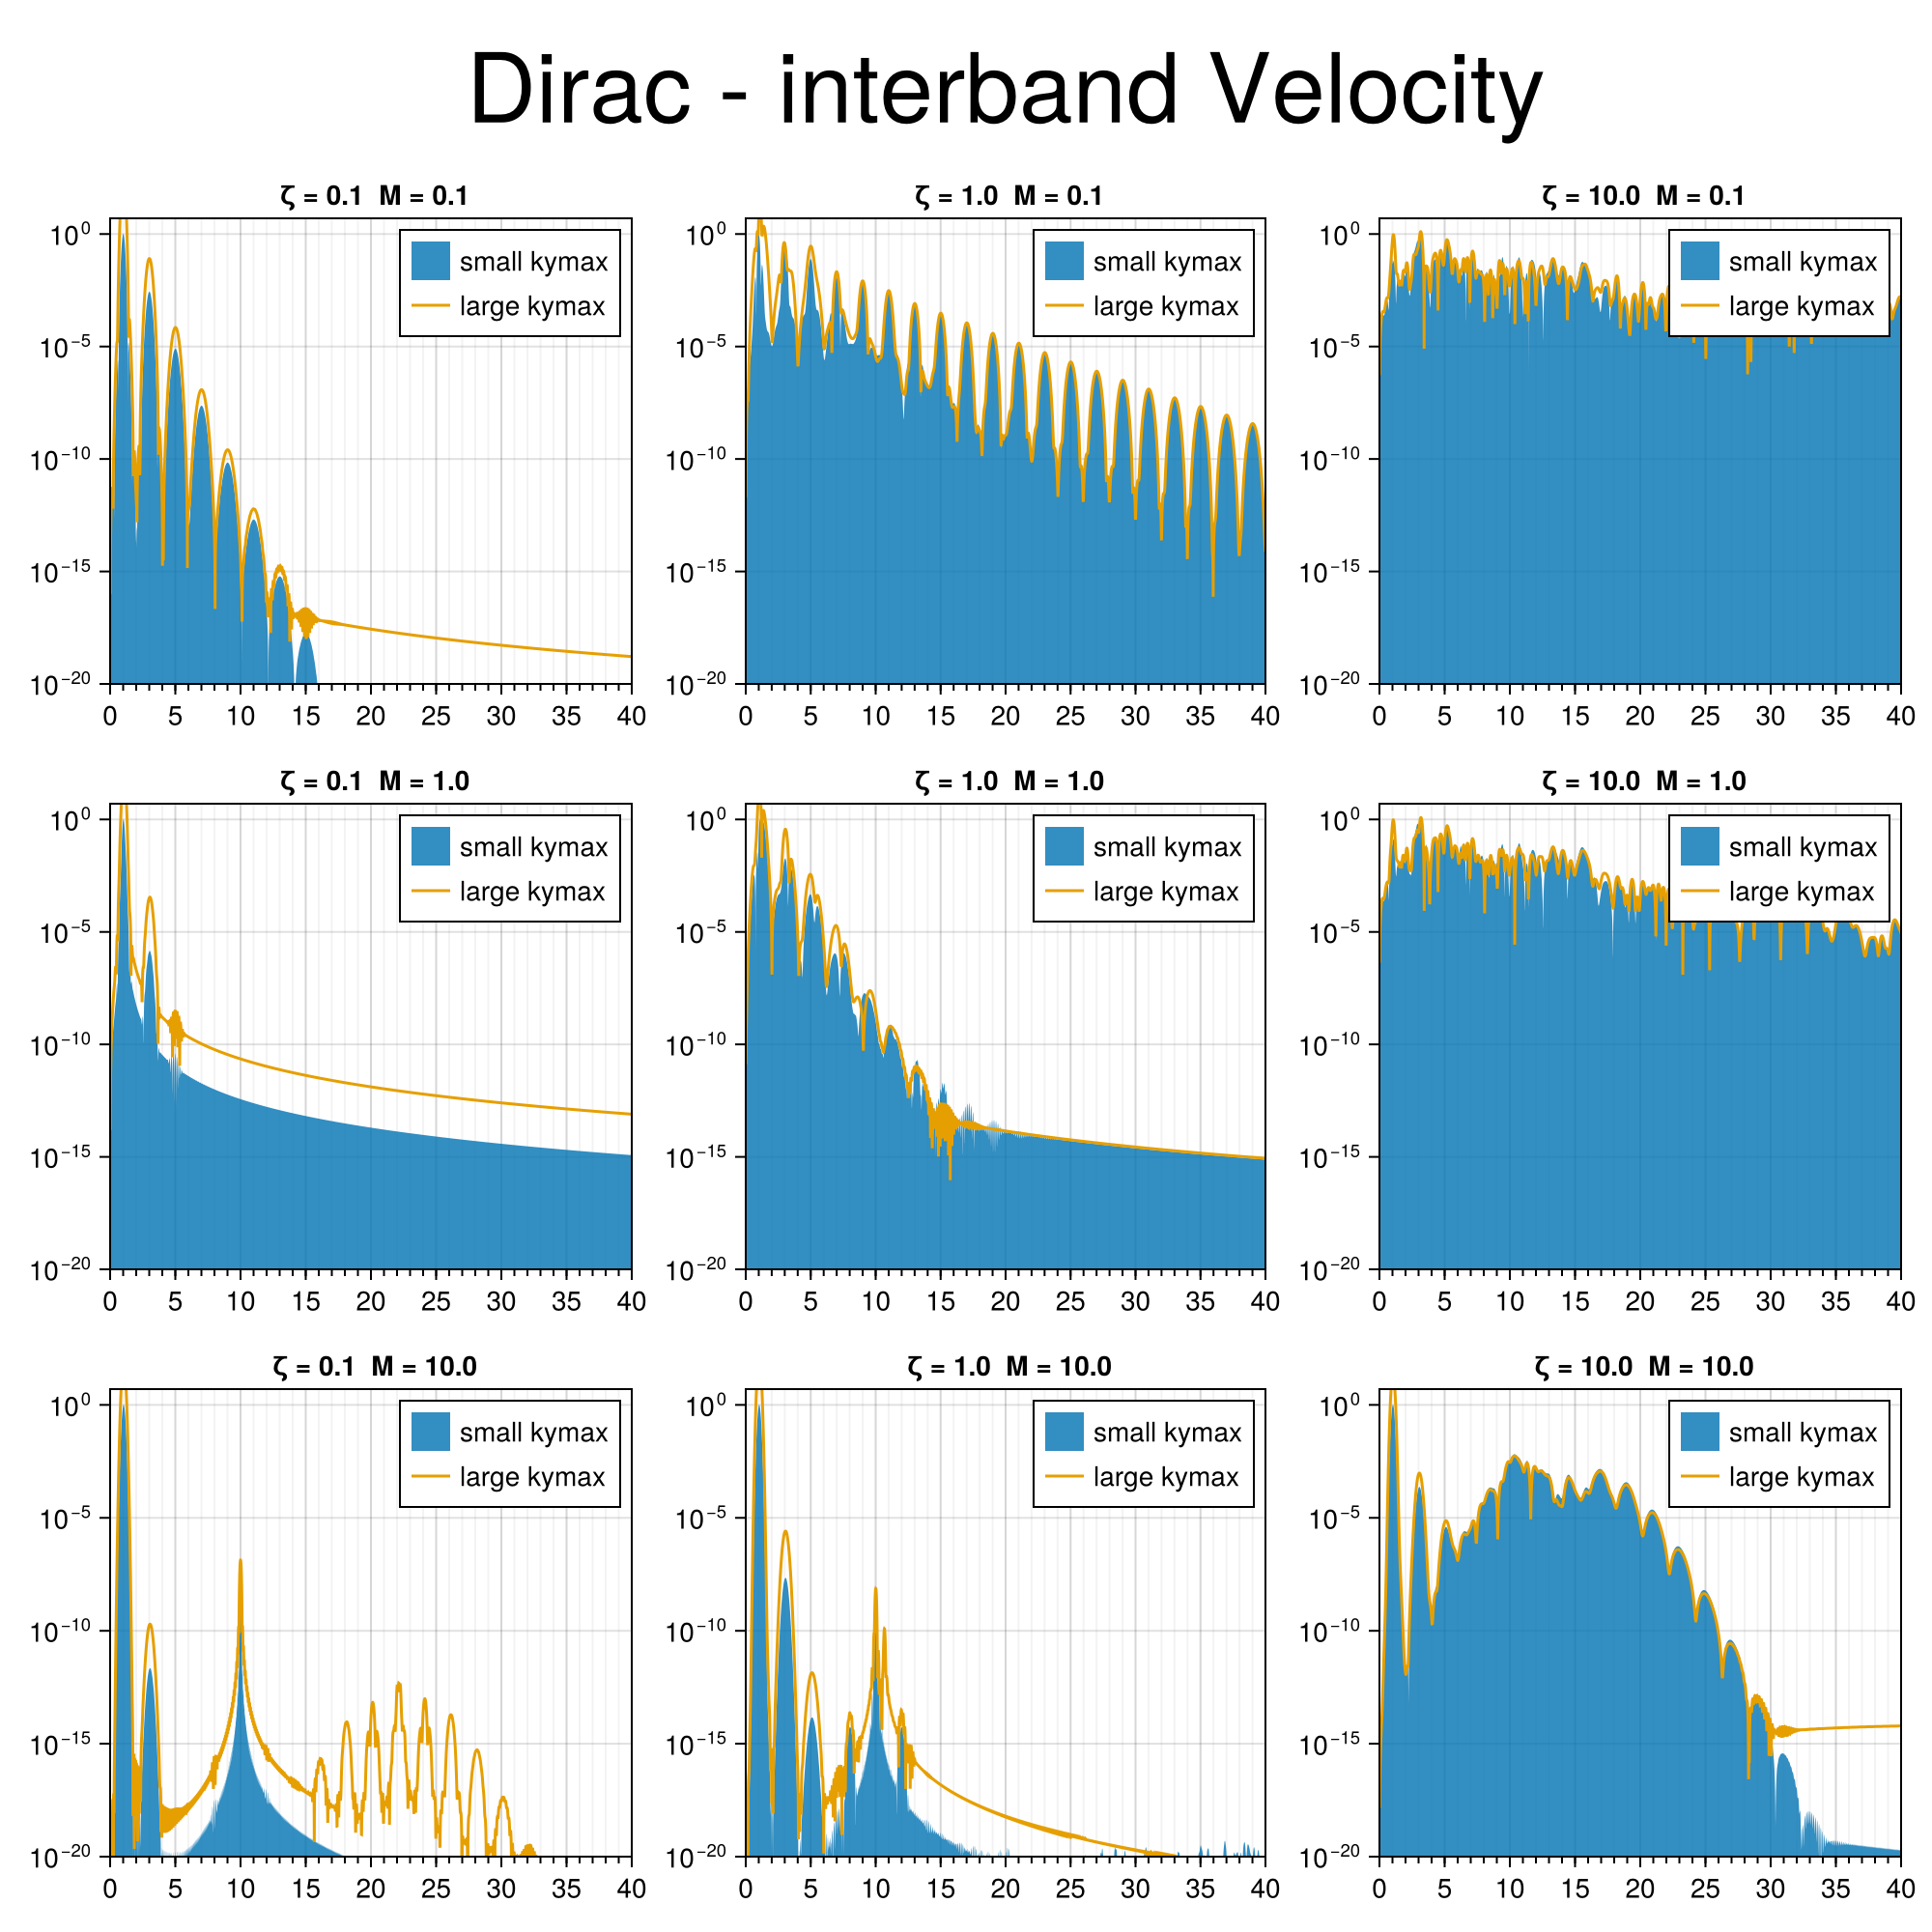

In [15]:
fig   = Figure(size=(1000,1000))
ii = CartesianIndices((1:3,1:3))
maxharm = 40
for i in 1:9
    ζ,M = match(r"zeta=([0-9.]+)_M=([0-9.]+)",diracfiles[i]).captures
    p = getparams(diracsims[i])
    v = diracvels[i]
    v2 = dirac_kymaxvels[i]
    specdata = [Damysos.calculate_spectrum(data,p.dt) for data in [v.vx,v.vxintra,v.vxinter]]
    specdata = [(data[1][data[2] .> 1e-50],data[2][data[2] .> 1e-50]) for data in specdata]

    specdata2 = [Damysos.calculate_spectrum(data,p.dt) for data in [v2.vx,v2.vxintra,v2.vxinter]]
    specdata2 = [(data[1][data[2] .> 1e-50],data[2][data[2] .> 1e-50]) for data in specdata2]

    norm = maximum(specdata[3][2])
    # norm2 = maximum(specdata2[1][2])
    norm2 = norm

    ax  = Axis(fig[ii[i][1],ii[i][2]],
        title=" ζ = $ζ  M = $M",
        yscale=log10,
        xminorticksvisible=true,
        xminorgridvisible=true,
        xminorticks=0:1:maxharm,
        xticks=0:5:maxharm)
    band!(ax,specdata[3][1],fill(1e-50,length(specdata[3][1])),specdata[3][2] ./norm,
        color=Cycled(1),
        alpha=1.0,
        label="small kymax")
    lines!(ax,specdata2[3][1],specdata2[3][2] ./ norm2,color=Cycled(2), label="large kymax")
    xlims!(ax,(0,40))
    ylims!(ax,(1e-20,5))
    axislegend(ax)
end


fig[0,:] = Label(fig,"Dirac - interband Velocity",fontsize=50)
CairoMakie.save("zeta-m-plane-plots/spectra-dirac-kymax-inter.png",fig,px_per_unit=5)
fig

In [20]:
fig